# ARSENL Backscatter Experiments Plotting

Grant Kirchhoff
Last Updated: 09-30-2022
University of Colorado Boulder

Plot post-processed data from 'fit_histogram_polynomial_complexity_iteration.ipynb'

Note: Make sure to set 'OD_str' parameter to appropriate dataset OD

In [1]:
import numpy as np
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt
import torch
from scipy import stats
import os
import xarray as xr
import sys

# cwd = os.getcwd()
# dirLib = cwd + r'/library'
# if dirLib not in sys.path:
#     sys.path.append(dirLib)

# import fit_polynomial_methods as fit
# import data_organize as dorg

In [2]:
load_dir = r'C:\Users\Grant\OneDrive - UCB-O365\ARSENL\Experiments\Deadtime_Experiments\Data\Postprocessed_Data'
files = os.listdir(load_dir)

ODs = np.zeros(len(files)).astype(str)
flight_time = {}
t_fine = {}
fit_rate_seg = {}
n_shots = {}
for i in range(len(files)):
    processed_data = xr.open_dataset(load_dir + r'\{}'.format(files[i]))
    key = files[i].split('_')[1][0:4]
    ODs[i] = key
    flight_time['{}'.format(key)] = processed_data.flight_time.values
    t_fine['{}'.format(key)] = processed_data.t_fine.values
    fit_rate_seg['{}'.format(key)] = processed_data.fit_rate_seg.values
    n_shots['{}'.format(key)] = processed_data.n_shots.values
    

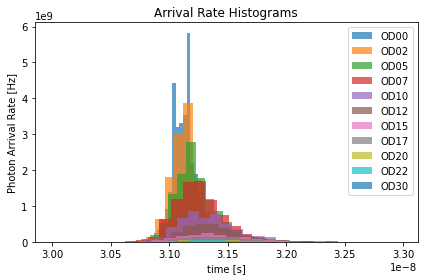

In [5]:
# Plot histograms on same plot

fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(len(flight_time)):
    OD_key = ODs[i]
    n, bins = np.histogram(flight_time[OD_key], bins=28)
    binwidth = np.diff(bins)[0]
    N = n / binwidth / n_shots[OD_key]  # [Hz] Scaling counts to arrival rate
    center = 0.5 * (bins[:-1] + bins[1:])
    ax.bar(center, N, align='center', width=binwidth, alpha=0.7, label=OD_key)

ax.set_title('Arrival Rate Histograms')
ax.set_xlabel('time [s]')
ax.set_ylabel('Photon Arrival Rate [Hz]')
ax.legend()
plt.tight_layout()
plt.show()
